In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
my_data = pd.read_csv('Life Expectancy Data.csv')
my_data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [3]:
orig_cols = list(my_data.columns)
new_cols = []
for col in orig_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').replace('-', '_').lower())
    
my_data.columns = new_cols
my_data.rename(columns={'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)

In [4]:
my_data.head()

country  year      status  life_expectancy  adult_mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant_deaths  alcohol  percentage_expenditure  hepatitis_b  measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   polio  total_expenditure  diphtheria  hiv/aids         gdp  population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   thinness_1_19_years  thinness_5_9_years  income_composition_of_resources  \
0                 17.2                17.3                            0.479   
1                 17.5                17.5                            0.476   
2                 17.7                17.7                            0.470   
3                 17.9                18.0                            0.463   
4                 18.2                18.2                            0.454   

   schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

In [5]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  polio               

In [6]:
my_data[my_data['life_expectancy'].isnull()]

country  year      status  life_expectancy  \
624            Cook Islands  2013  Developing              NaN   
769                Dominica  2013  Developing              NaN   
1650       Marshall Islands  2013  Developing              NaN   
1715                 Monaco  2013  Developing              NaN   
1812                  Nauru  2013  Developing              NaN   
1909                   Niue  2013  Developing              NaN   
1958                  Palau  2013  Developing              NaN   
2167  Saint Kitts and Nevis  2013  Developing              NaN   
2216             San Marino  2013  Developing              NaN   
2713                 Tuvalu  2013  Developing              NaN   

      adult_mortality  infant_deaths  alcohol  percentage_expenditure  \
624               NaN              0     0.01                0.000000   
769               NaN              0     0.01               11.419555   
1650              NaN              0     0.01              871.878317   
1715              NaN              0     0.01                0.000000   
1812              NaN              0     0.01               15.606596   
1909              NaN              0     0.01                0.000000   
1958              NaN              0      NaN              344.690631   
2167              NaN              0     8.54                0.000000   
2216              NaN              0     0.01                0.000000   
2713              NaN              0     0.01               78.281203   

      hepatitis_b  measles  ...  polio  total_expenditure  diphtheria  \
624          98.0        0  ...   98.0               3.58        98.0   
769          96.0        0  ...   96.0               5.58        96.0   
1650          8.0        0  ...   79.0              17.24        79.0   
1715         99.0        0  ...   99.0               4.30        99.0   
1812         87.0        0  ...   87.0               4.65        87.0   
1909         99.0        0  ...   99.0               7.20        99.0   
1958         99.0        0  ...   99.0               9.27        99.0   
2167         97.0        0  ...   96.0               6.14        96.0   
2216         69.0        0  ...   69.0               6.50        69.0   
2713          9.0        0  ...    9.0              16.61         9.0   

      hiv/aids          gdp  population  thinness_1_19_years  \
624        0.1          NaN         NaN                  0.1   
769        0.1   722.756650         NaN                  2.7   
1650       0.1  3617.752354         NaN                  0.1   
1715       0.1          NaN         NaN                  NaN   
1812       0.1   136.183210         NaN                  0.1   
1909       0.1          NaN         NaN                  0.1   
1958       0.1  1932.122370       292.0                  0.1   
2167       0.1          NaN         NaN                  3.7   
2216       0.1          NaN         NaN                  NaN   
2713       0.1  3542.135890      1819.0                  0.2   

      thinness_5_9_years  income_composition_of_resources  schooling  
624                  0.1                              NaN        NaN  
769                  2.6                            0.721       12.7  
1650                 0.1                              NaN        0.0  
1715                 NaN                              NaN        NaN  
1812                 0.1                              NaN        9.6  
1909                 0.1                              NaN        NaN  
1958                 0.1                            0.779       14.2  
2167                 3.6                            0.749       13.4  
2216                 NaN                              NaN       15.1  
2713                 0.1                              NaN        0.0  

[10 rows x 22 columns]

In [7]:
my_data.country.value_counts().tail(20)

Estonia                  16
Ethiopia                 16
Fiji                     16
Greece                   16
Finland                  16
Gabon                    16
Gambia                   16
Georgia                  16
Germany                  16
Ghana                    16
Tuvalu                    1
Cook Islands              1
Marshall Islands          1
Monaco                    1
Palau                     1
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: country, dtype: int64

In [8]:
my_data.shape

(2938, 22)

In [9]:
num_col = list(my_data.select_dtypes(include=['int64', 'float64']).columns)

num_col.remove('life_expectancy')
num_col.remove('adult_mortality')

my_data[num_col] = my_data[num_col].fillna(my_data[num_col].mean())

my_data.dropna(inplace=True)
my_data.reset_index(drop=True)

my_data.shape

(2928, 22)

In [10]:
continent = pd.read_csv('countryContinent.csv', encoding='ISO-8859-1')
continent.head()

country code_2 code_3  country_code     iso_3166_2 continent  \
0     Afghanistan     AF    AFG             4  ISO 3166-2:AF      Asia   
1   Åland Islands     AX    ALA           248  ISO 3166-2:AX    Europe   
2         Albania     AL    ALB             8  ISO 3166-2:AL    Europe   
3         Algeria     DZ    DZA            12  ISO 3166-2:DZ    Africa   
4  American Samoa     AS    ASM            16  ISO 3166-2:AS   Oceania   

        sub_region  region_code  sub_region_code  
0    Southern Asia        142.0             34.0  
1  Northern Europe        150.0            154.0  
2  Southern Europe        150.0             39.0  
3  Northern Africa          2.0             15.0  
4        Polynesia          9.0             61.0

In [11]:
country2continent = dict()
for country in continent['country']:
  country2continent[country] = continent[continent['country']==country]['continent'].values[0]

update = {'Republic of Korea' : 'Asia', 'Republic of Moldova' : 'Europe' ,
          'Democratic Republic of the Congo' : 'Africa', 'Czechia' : 'Europe', 
          'United Republic of Tanzania' : 'Africa', 'The former Yugoslav republic of Macedonia' : 'Europe', 
          "Democratic People's Republic of Korea" : 'Asia'}

country2continent.update(update)

In [12]:
my_data['continent'] = my_data['country'].copy().replace(country2continent)
my_data.continent.isna().sum()

0

In [13]:
my_data['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [14]:
def remove_whitespace(x):
    try:
        x = "".join(x.split())
    except:
        pass
    return x

my_data.country = my_data.country.apply(remove_whitespace)

In [15]:
my_data = pd.get_dummies(my_data, drop_first=True, columns=['status', 'continent'])

X = my_data.drop(columns='life_expectancy', axis=1)
y = my_data['life_expectancy']

In [17]:
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: life_expectancy, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
from google.colab import files

my_data.to_csv('my_data.csv', encoding = 'utf-8-sig', index=False) 
files.download('my_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Work to do:
- Filter outliers, noises
- Plot data to see correlation between features and output
- Eliminate features doesn't affect much on output
- Model implementation: Decision Tree, Random Forest, Gradient Boosting, AdaBoost, some others feature selection methods


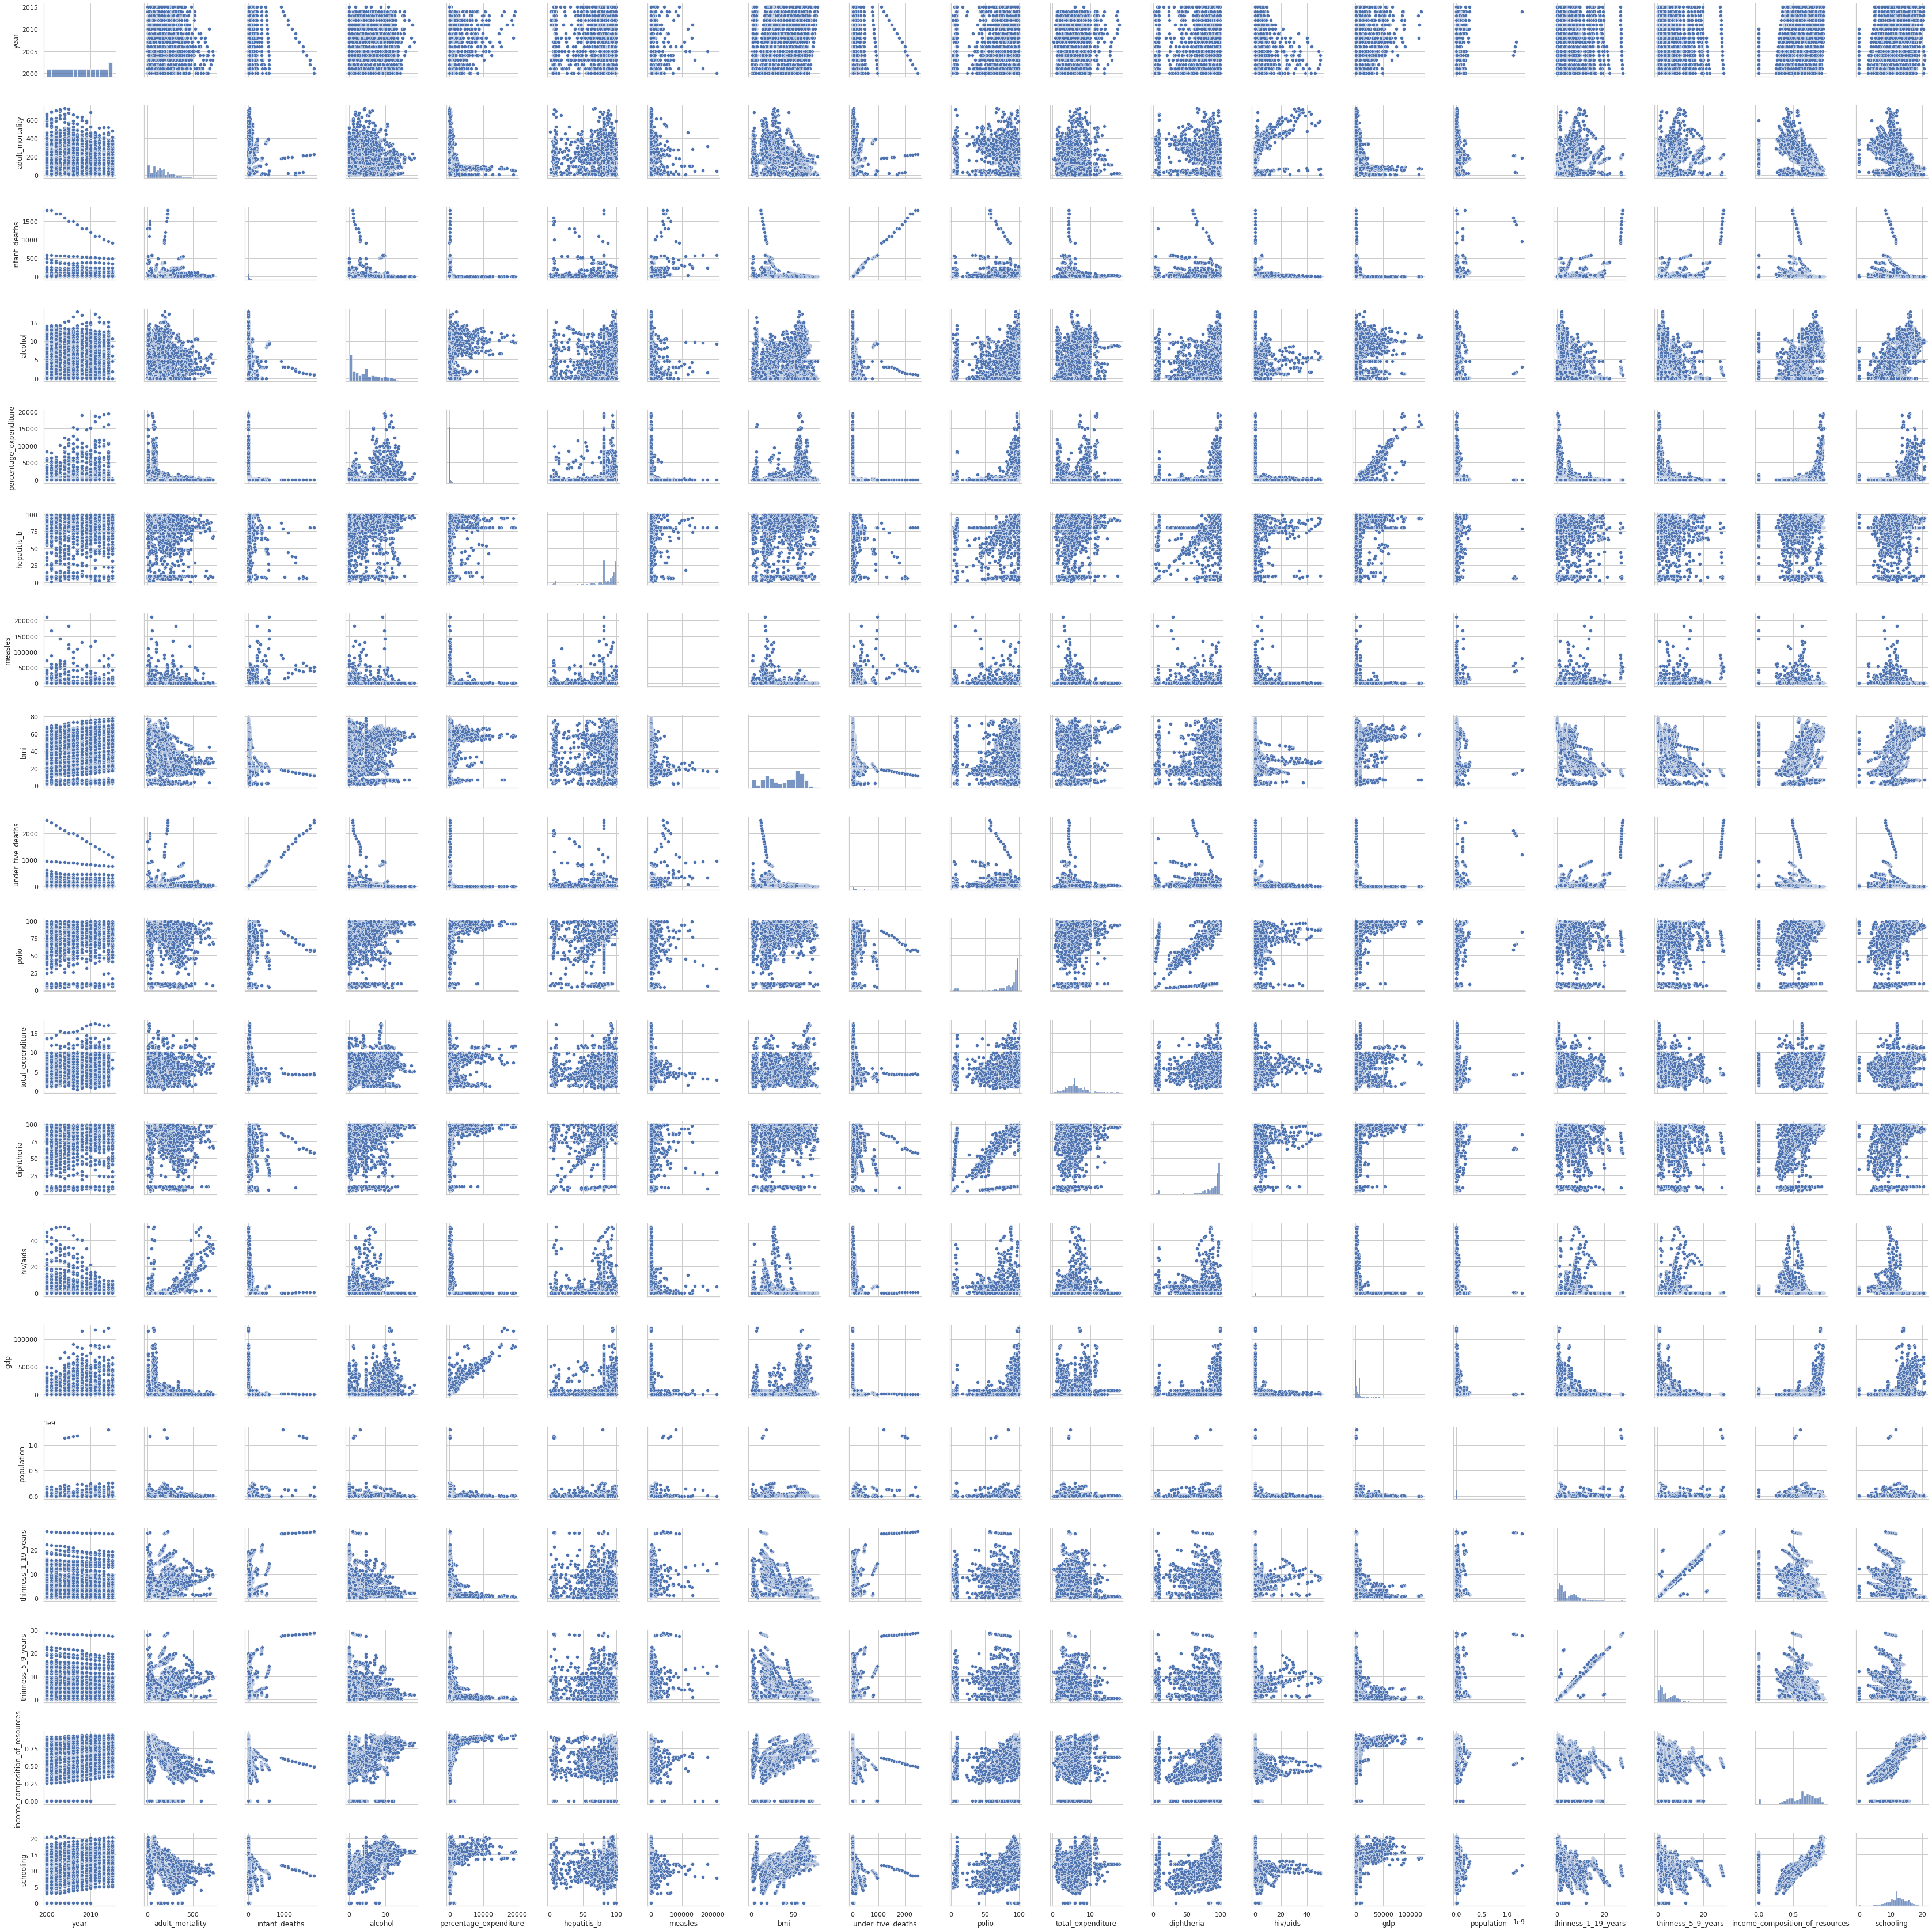

In [ ]:
sns.pairplot(my_data[['year', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling']])